
# Project: No-Show Appointment Dataset Analysis

## Table of Contents

1. [Introduction](#Introduction)
2. [Data Wrangling](#Data-Wrangling)
3. [EDA](#Exploratory-Data-Analysis)
4. [Conclusions](#Conclusions)    

## Introduction

The notebook's purpose is to analyze [No-Show Appointment Dataset](#https://www.kaggle.com/joniarroba/noshowappointments). This dataset is not up-to-date (V2). You can find the last version in the previouse link.


In [14]:
# importing packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline

In [15]:
# load dataset
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Each entry in the dataset contains the appointment's information, its feature are:

- **PatientId**: Unique ID of the patient
- **AppointmentID**: Unique ID of appointment
- **Gender**: Patient's gender
- **ScheduledDay**: The day the appointment was registered
- **AppointmentDay**: The day of the appointment
- **Age**: patient's age 
- **Neighbourhood**: The place of appointment
- **Scholarship**: Does the patient have formal scholarship
- **Hipertension**: Does the patient have hipertension 
- **Diabetes**: Does the patient have diabetes 
- **Alcoholism**: Does the patient have Alcoholism
- **Handcap**: does the patient have any disabilities and how many
- **SMS_received**: did the patient receive sms reminder
- **No-show**: indicates if the patient didn't show up (Yes for no-show)

We can ask many questions by just looking at the describtion of the dataset, such as:
- Is gender a big factor in abscence?
- Does age have a big effect on the patient's abscence?
- Do SMS reminders have any postive effect on the number of abscences?

We will tackle these questions in this notebook.

## Data Wrangling

### General Properties

In [16]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset consists of 110527 entries. There's no missing data in any entry.

In [18]:
# Check for duplicates befor dropping the unique IDs
df.duplicated().sum()

0

Some of the columns are not helpful for our questions, such as the ID columns **PatientID** and **AppointmentID**.
We will remove these irrelevent columns for easier EDA.

In [19]:
# droping {"PatientId", 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Scholarship'}
df.drop(["PatientId", 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood', 'Scholarship'], axis= 1, inplace= True)

In [20]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Gender        110527 non-null  object
 1   Age           110527 non-null  int64 
 2   Hipertension  110527 non-null  int64 
 3   Diabetes      110527 non-null  int64 
 4   Alcoholism    110527 non-null  int64 
 5   Handcap       110527 non-null  int64 
 6   SMS_received  110527 non-null  int64 
 7   No-show       110527 non-null  object
dtypes: int64(6), object(2)
memory usage: 6.7+ MB


Some data types can be enchanced. All the chronic illnesses (Hipertension, Diabetes) are better presented as bool or string not int. (SMS_received and Alcoholism) are also int.

In [21]:
# check number of unique values in each column
df.nunique()

Gender            2
Age             104
Hipertension      2
Diabetes          2
Alcoholism        2
Handcap           5
SMS_received      2
No-show           2
dtype: int64

Looks like **Handcap** is sorted into levels. we can look further at **handcap**

In [22]:
# Check values and their count
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

Looks like **Handcap** is sorted into the number of disabilities. We will turn it to bool for easier EDA.

In [23]:
# looking for nan values
df.isna().sum()

Gender          0
Age             0
Hipertension    0
Diabetes        0
Alcoholism      0
Handcap         0
SMS_received    0
No-show         0
dtype: int64

The data has no nan values.

In [24]:
df.describe()

,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There's entries with age of -1. Let's see how many are there.

In [25]:
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

Only one entry, so we can remove it.

The age of 0 is assumed to be babies.


### Data Cleaning

In [26]:
# First use lowercase in columns
df.columns = df.columns.str.lower()
df.columns

Index(['gender', 'age', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show'],
      dtype='object')

Turning some features to boolean.

In [27]:
bool_col = ['hipertension', 'diabetes', 'alcoholism', 'sms_received']

# first check their values
df[bool_col].describe()

,hipertension,diabetes,alcoholism,sms_received
count,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.197246,0.071865,0.030400,0.321026
std,0.397921,0.258265,0.171686,0.466873
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


With min 0 and max 1, we can turn them to boolean.

In [28]:
# Casting to bool
for col in bool_col:
    df[col] = df[col].astype('bool')

In [29]:
df.head()

,gender,age,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,62,True,False,False,0,False,No
1,M,56,False,False,False,0,False,No
2,F,62,False,False,False,0,False,No
3,F,8,False,False,False,0,False,No
4,F,56,True,True,False,0,False,No


Everything looks good. As for **handcap**, we will turn 0 for no disability and other values to disability.

In [30]:
df['handcap'] = df.handcap > 0
df['handcap'].value_counts()

False    108286
True       2241
Name: handcap, dtype: int64

In [31]:
df = df[df.age >= 0]

In [32]:
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Let's look at the data after cleaning

In [33]:
df.head()

,gender,age,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,62,True,False,False,False,False,No
1,M,56,False,False,False,False,False,No
2,F,62,False,False,False,False,False,No
3,F,8,False,False,False,False,False,No
4,F,56,True,True,False,False,False,No


In [34]:
df.tail()

,gender,age,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
110522,F,56,False,False,False,False,True,No
110523,F,51,False,False,False,False,True,No
110524,F,21,False,False,False,False,True,No
110525,F,38,False,False,False,False,True,No
110526,F,54,False,False,False,False,True,No


## Exploratory Data Analysis


### Is gender a big factor in abscence?

In [35]:
# look at number of patients per gender
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

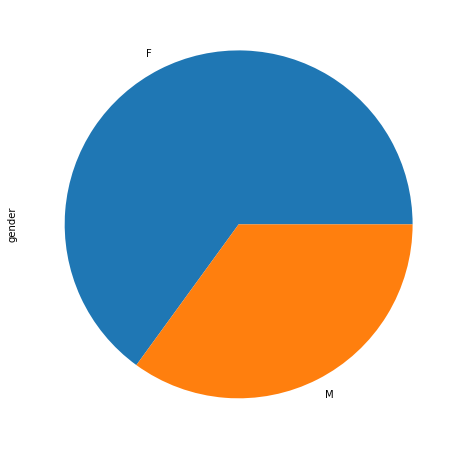

In [36]:
df.gender.value_counts().plot(kind='pie', figsize=(8,8));

Female patients numbers are almost double the male numbers, which shows that females tend to care for their health more.

In [37]:
# some masks
showed = df['no-show'] == 'No'
abscent = df['no-show'] == 'Yes'

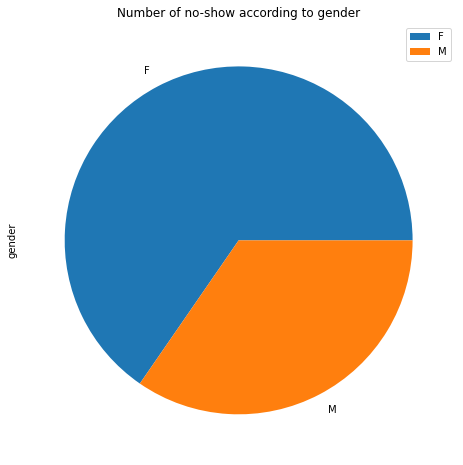

In [38]:
df[abscent].gender.value_counts().plot.pie(figsize=(8,8), title='Number of no-show according to gender', legend=True);

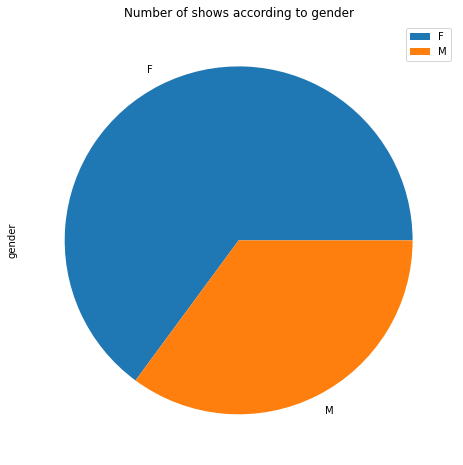

In [39]:
df[showed].gender.value_counts().plot.pie(figsize=(8,8), title='Number of shows according to gender', legend=True);

Both plots show that number of the females is almost double of males, but ratio of abscence is the same. We can confirm this by calculating the ration.

In [40]:
# ratio of absences per gender
df[abscent].gender.value_counts() / df.gender.value_counts()

F    0.203149
M    0.199679
Name: gender, dtype: float64

The abscence ratio for both genders is the same. Females have a 20% and males have 19.9%.

It appears that gender has no effect on abscence.

### Does age have a big effect on the patient's abscence?

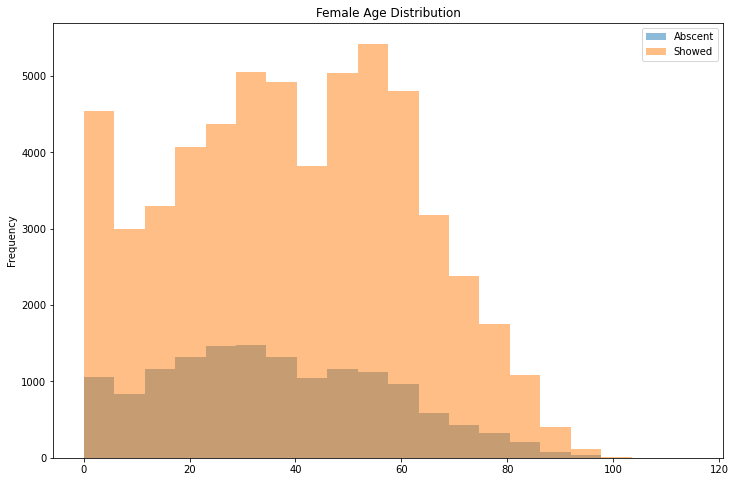

In [68]:
# Female age distribution
df[abscent].age[df.gender == 'F'].plot.hist(alpha= 0.5, figsize=(12,8), legend=True, label='Abscent',bins=20)
df[showed].age[df.gender == 'F'].plot.hist(alpha= 0.5, figsize=(12,8), legend=True ,label='Showed',bins=20, title='Female Age Distribution');

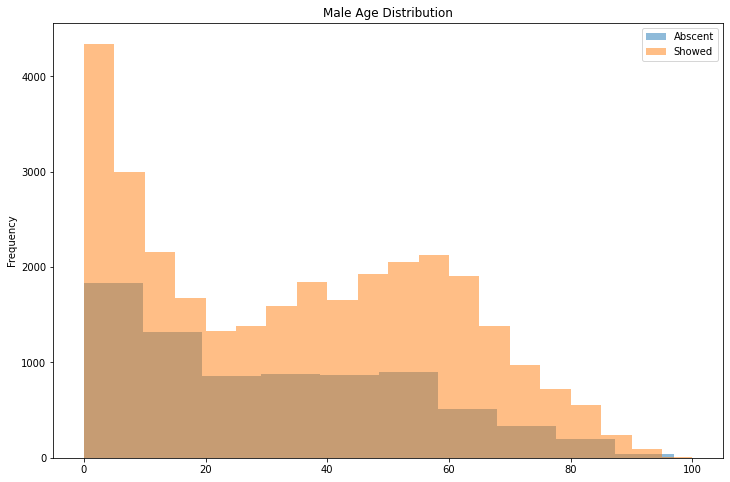

In [70]:
# Male age dist.
df[abscent].age[df.gender == 'M'].plot.hist(alpha= 0.5, figsize=(12,8), legend=True, label='Abscent')
df[showed].age[df.gender == 'M'].plot.hist(alpha= 0.5, figsize=(12,8), legend=True ,label='Showed', bins=20, title='Male Age Distribution');

The histograms are skewed to the right, which indicates that the younger people are more likely to not show for the appointment.

In males, 0-20 years old have the most abscence. In females, 20-40 years old have the most abscence.

### Do SMS reminders have any postive effect on the number of abscences?

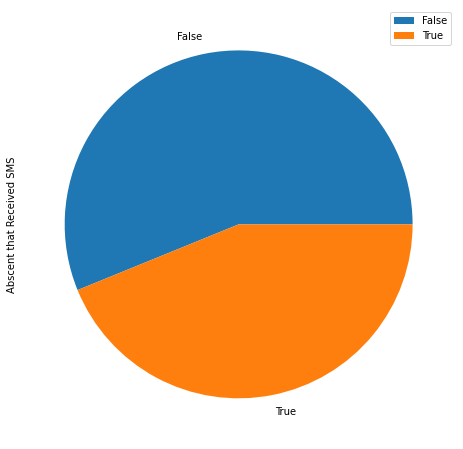

In [107]:
# Pie chart of abscent patients
df[abscent].sms_received.value_counts().plot(kind='pie', figsize=(12,8), legend=True, label='Abscent that Received SMS');

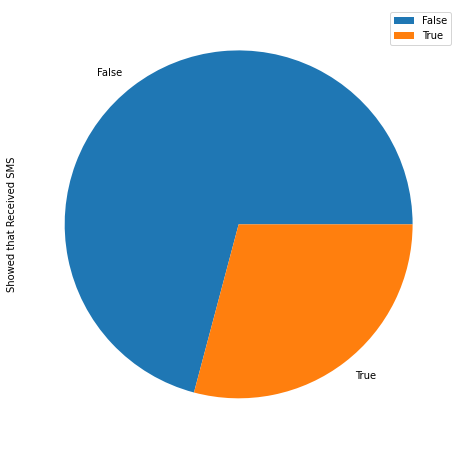

In [108]:
# Pie chart of patient that showed up
df[showed].sms_received.value_counts().plot(kind='pie', figsize=(12,8), legend=True, label='Showed that Received SMS');

The ratio of the abscent patients that received SMS is higher than the ratio of patients that showed up.

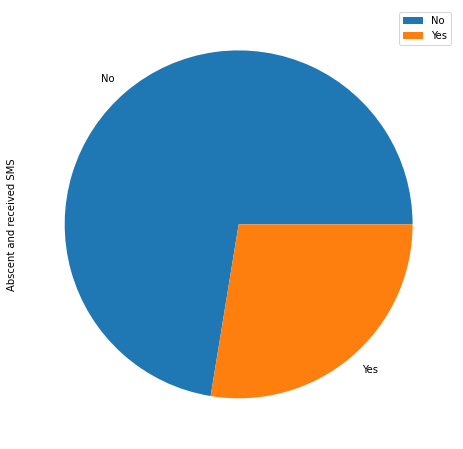

In [113]:
df[df.sms_received == True]['no-show'].value_counts().plot(kind='pie', figsize=(10,8), legend=True, label='Abscent and received SMS'); 

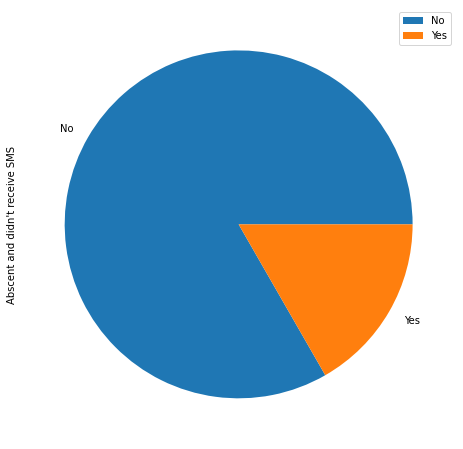

In [114]:
df[df.sms_received == False]['no-show'].value_counts().plot(kind='pie', figsize=(10,8), legend=True, label="Abscent and didn't receive SMS"); 

The ratio of abscent patients who received SMS are higher than patients who didn't receive one.

## Conclusions

From the EDA we can suggest that:

- Gender does not have an effect on the abscence of patients.
- The younger patients have a higher chance of not showing for appointment.
- The SMS reminder does not help with the no show appointments.

The dataset has some limitations:

- The dataset has many categorical features, which prevents alot of the statistical analysis.
- The analysis used descriptive statistics.
- Some of the features are missing a good description, such as levels of **handcap** feature, how does the SMS system work, and when is it sent and to whom.